In [1]:
%load_ext autoreload

%autoreload 2
import os
import sys
from napari_convpaint.conv_paint_utils import *
from napari_convpaint.conv_paint_model import *
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

## Test new image processing methods

In [69]:
side_len = 8
num_stacks = 3
img = np.array([np.random.randint(4) for a in range(side_len**2 * num_stacks)]).reshape(num_stacks, side_len, side_len)
print(img)

[[[1 0 2 0 0 2 2 1]
  [2 3 3 2 3 1 0 0]
  [2 2 3 2 0 2 1 3]
  [0 1 1 3 1 1 1 3]
  [0 2 1 0 2 1 3 3]
  [1 0 3 2 1 0 2 2]
  [3 3 0 2 3 1 0 1]
  [2 3 1 3 3 3 2 2]]

 [[1 2 1 0 3 1 3 1]
  [0 2 2 3 1 1 1 3]
  [3 2 0 2 0 3 0 1]
  [0 3 0 0 2 2 2 3]
  [2 3 0 2 0 0 1 3]
  [3 0 3 2 1 1 2 1]
  [1 1 3 2 1 3 2 1]
  [3 2 1 2 0 3 2 2]]

 [[0 0 0 2 0 3 1 1]
  [0 2 2 1 0 2 3 3]
  [1 1 0 1 3 3 1 1]
  [3 3 1 2 0 0 2 1]
  [2 0 3 1 0 1 1 2]
  [0 0 0 3 2 3 1 0]
  [0 2 1 1 0 0 0 1]
  [0 0 3 2 0 1 3 1]]]


In [70]:
factor = 3
scaled_img = scale_img(img, factor, use_labels=True)
print(scaled_img)

[[[3 1]
  [0 1]]

 [[2 1]
  [2 1]]

 [[1 0]
  [0 0]]]


In [71]:
rescaled_img = rescale_features(scaled_img, img.shape)
print(rescaled_img[0])

[[1.546875 1.765625 1.765625 1.546875 1.328125 1.109375 1.109375 1.328125]
 [2.015625 2.421875 2.421875 2.015625 1.609375 1.203125 1.203125 1.609375]
 [2.015625 2.421875 2.421875 2.015625 1.609375 1.203125 1.203125 1.609375]
 [1.546875 1.765625 1.765625 1.546875 1.328125 1.109375 1.109375 1.328125]
 [1.078125 1.109375 1.109375 1.078125 1.046875 1.015625 1.015625 1.046875]
 [0.609375 0.453125 0.453125 0.609375 0.765625 0.921875 0.921875 0.765625]
 [0.609375 0.453125 0.453125 0.609375 0.765625 0.921875 0.921875 0.765625]
 [1.078125 1.109375 1.109375 1.078125 1.046875 1.015625 1.015625 1.046875]]


In [72]:
rescaled_img = rescale_class_labels(scaled_img, img.shape)
print(rescaled_img[0])

[[3 3 3 3 1 1 1 1]
 [3 3 3 3 1 1 1 1]
 [3 3 3 3 1 1 1 1]
 [3 3 3 3 1 1 1 1]
 [0 0 0 0 1 1 1 1]
 [0 0 0 0 1 1 1 1]
 [0 0 0 0 1 1 1 1]
 [0 0 0 0 1 1 1 1]]


In [73]:
img_len = 16
scaling_factor = 3
kernel_size = 3
down_scaled_img = img_len // scaling_factor
scaled_kernel_size = kernel_size * scaling_factor
scaled_padding = (kernel_size // 2) * scaling_factor
padded_with_scaled_kernel = img_len + 2*(scaled_kernel_size//2)
padded_with_scaled_padding = img_len + 2*scaled_padding
down_scaled_padded_with_kernel = padded_with_scaled_kernel // scaling_factor
down_scaled_padded_with_padding = padded_with_scaled_padding // scaling_factor
print("img:", img_len)
print("scaling factor:", scaling_factor)
print("kernel:", kernel_size)
print("downscaled img:", down_scaled_img)
print("downscaled + kernel:", down_scaled_img + 2*(kernel_size//2))
print("scaled kernel:", scaled_kernel_size)
print("padded img:", padded_with_scaled_kernel)
print("with scaled kernel:", down_scaled_padded_with_kernel)
print("with scaled padding:", down_scaled_padded_with_padding)

img: 16
scaling factor: 3
kernel: 3
downscaled img: 5
downscaled + kernel: 7
scaled kernel: 9
padded img: 24
with scaled kernel: 8
with scaled padding: 7


In [74]:
side_len = 80
num_stacks = 3
img = np.array([np.random.randint(4) for a in range(side_len**2 * num_stacks)]).reshape(1, num_stacks, side_len, side_len)
print(img)

[[[[2 1 1 ... 3 1 0]
   [2 3 3 ... 1 3 0]
   [1 0 2 ... 3 3 1]
   ...
   [1 2 3 ... 3 3 3]
   [0 2 1 ... 2 0 3]
   [2 0 0 ... 2 0 2]]

  [[3 0 0 ... 1 0 2]
   [2 3 2 ... 2 2 3]
   [0 2 1 ... 3 0 2]
   ...
   [0 0 1 ... 1 3 3]
   [3 0 3 ... 1 1 0]
   [3 2 0 ... 1 1 3]]

  [[2 0 3 ... 1 0 3]
   [3 1 1 ... 0 0 2]
   [2 2 3 ... 2 2 1]
   ...
   [3 0 0 ... 3 1 0]
   [1 0 3 ... 3 0 0]
   [1 3 0 ... 2 1 0]]]]


In [75]:
kernel_size = (2, 5, 3)
scale_factor = 10
annots = np.zeros(img.shape[1:])
padded_img = pad_for_kernel(img, kernel_size, scale_factor)
padded_annots = pad_for_kernel(annots, kernel_size, scale_factor)
print(padded_img.shape, padded_annots.shape)

TypeError: pad_for_kernel() takes 2 positional arguments but 3 were given

In [55]:
patch_size = (3, 7, 3)
scale_factor = 3
annots = np.zeros(img.shape[1:])
padded_img = pad_to_patch(img, patch_size, scale_factor)
padded_annots = pad_to_patch(annots, patch_size, scale_factor)
print(padded_img.shape, padded_annots.shape)

(1, 3, 84, 81) (3, 84, 81)


In [ ]:
input_scaling = 3
pre_process_stack(img, input_scaling, kernel_size, patch_size, scale_factor).shape

In [10]:
compute_patch_padding((1, 15, 24, 29), (7, 14, 14))

(6, 4, 13)

In [23]:
cp_model = ConvpaintModel()

In [34]:
cp_model.pre_process_list([img])[0].shape
cp_model.pre_process_stack(img).shape

(1, 3, 64, 64)

## Test using a CP_model object but OLD methods

In [16]:
cpm = ConvpaintModel()

In [19]:
img = np.array(Image.open("400_img.png"))
annot = np.array(Image.open("400_scribbles_all_00100_a.png"))

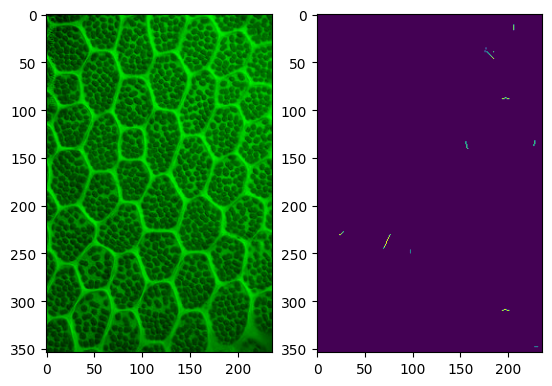

In [20]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img)
ax[1].imshow(annot)

In [66]:
img = np.moveaxis(img, -1, 0)

In [67]:
f, t = cpm.get_features_current_layers(img, annot)

RuntimeError: Calculated padded input size per channel: (0 x 224). Kernel size: (14 x 14). Kernel size can't be greater than actual input size

In [49]:
np.array(f).shape, np.array(t).shape

((77, 576), (77,))

In [50]:
clf = cpm.train_classifier(f, t)

0:	learn: 0.5964641	total: 172ms	remaining: 8.41s
1:	learn: 0.5136342	total: 177ms	remaining: 4.24s
2:	learn: 0.4319420	total: 183ms	remaining: 2.87s
3:	learn: 0.3874546	total: 189ms	remaining: 2.17s
4:	learn: 0.3542337	total: 194ms	remaining: 1.75s
5:	learn: 0.3036628	total: 200ms	remaining: 1.47s
6:	learn: 0.2806653	total: 205ms	remaining: 1.26s
7:	learn: 0.2544801	total: 212ms	remaining: 1.11s
8:	learn: 0.2226366	total: 217ms	remaining: 990ms
9:	learn: 0.1991781	total: 223ms	remaining: 890ms
10:	learn: 0.1850437	total: 229ms	remaining: 811ms
11:	learn: 0.1633297	total: 235ms	remaining: 743ms
12:	learn: 0.1477998	total: 240ms	remaining: 683ms
13:	learn: 0.1301907	total: 246ms	remaining: 632ms
14:	learn: 0.1167592	total: 251ms	remaining: 586ms
15:	learn: 0.1080117	total: 256ms	remaining: 544ms
16:	learn: 0.0994865	total: 262ms	remaining: 509ms
17:	learn: 0.0911894	total: 267ms	remaining: 475ms
18:	learn: 0.0873593	total: 272ms	remaining: 444ms
19:	learn: 0.0798084	total: 278ms	remaini

In [63]:
f_all = cpm.fe_model.get_features_scaled(img, cpm.param)

In [64]:
np.array(f_all).shape

(384, 354, 236)

In [65]:
pred = cpm.predict_image(img)

AttributeError: 'NoneType' object has no attribute 'predict'

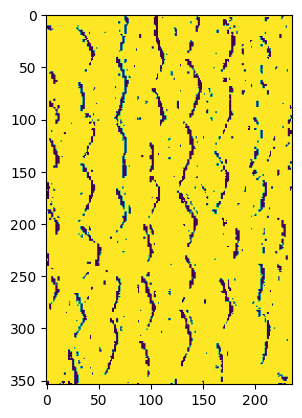

In [60]:
plt.imshow(pred)

In [62]:
cpm.set_param(fe_name="dinov2_vits14_reg")
cpm.set()

C:\Users\roman/.cache\torch\hub\facebookresearch_dinov2_main\dinov2\layers\swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
C:\Users\roman/.cache\torch\hub\facebookresearch_dinov2_main\dinov2\layers\attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
C:\Users\roman/.cache\torch\hub\facebookresearch_dinov2_main\dinov2\layers\block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


In [2]:
new_cpm = ConvpaintModel()
fe_type = "efficient_netb0"
new_cpm.set(fe_name=fe_type, fe_use_cuda=False)

In [3]:
temp_fe_layer_keys = new_cpm.get_fe_layer_keys()
print(temp_fe_layer_keys)

['features.0.0 Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)', 'features.1.0.block.0.0 Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)', 'features.1.0.block.1.fc1 Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))', 'features.1.0.block.1.fc2 Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))', 'features.1.0.block.2.0 Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)', 'features.2.0.block.0.0 Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)', 'features.2.0.block.1.0 Conv2d(96, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=96, bias=False)', 'features.2.0.block.2.fc1 Conv2d(96, 4, kernel_size=(1, 1), stride=(1, 1))', 'features.2.0.block.2.fc2 Conv2d(4, 96, kernel_size=(1, 1), stride=(1, 1))', 'features.2.0.block.3.0 Conv2d(96, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)', 'features.2.1.block.0.0 Conv2d(24, 144, kernel_size=(1, 1), stride=(1, 1), bias=False)', 'features.2.1.b

In [93]:
print(new_cpm.get_param())
print(new_cpm.get_default_param())
print(new_cpm.fe_model.get_default_param())

Param(classifier=None, multi_channel_img=False, rgb_img=False, normalize=2, image_downsample=1, tile_annotations=True, tile_image=False, fe_name='vgg16', fe_layers=['features.0 Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))'], fe_padding=1, fe_scalings=[1, 2, 4], fe_order=0, fe_use_min_features=False, fe_use_cuda=False, clf_iterations=50, clf_learning_rate=0.1, clf_depth=5)
Param(classifier=None, multi_channel_img=False, rgb_img=False, normalize=2, image_downsample=1, tile_annotations=True, tile_image=False, fe_name='vgg16', fe_layers=['features.0 Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))'], fe_padding=0, fe_scalings=[1, 2, 4], fe_order=0, fe_use_min_features=False, fe_use_cuda=False, clf_iterations=50, clf_learning_rate=0.1, clf_depth=5)
Param(classifier=None, multi_channel_img=None, rgb_img=None, normalize=None, image_downsample=None, tile_annotations=True, tile_image=False, fe_name='vgg16', fe_layers=['features.0 Conv2d(3, 64, kernel_size=(3,

In [96]:
for l in new_cpm.get_param().fe_layers:
    print(l)

features.0 Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [28]:
named_modules = new_cpm.fe_model.model.named_modules()
named_modules = [n for n in named_modules if len(list(n[1].named_modules())) == 1]

In [29]:
module_id_dict = dict([(x[0] + ' ' + x[1].__str__(), x[0]) for x in named_modules])

In [30]:
module_dict = dict([(x[0] + ' ' + x[1].__str__(), x[1]) for x in named_modules])

In [31]:
selectable_layer_dict = dict([(x[0] + ' ' + x[1].__str__(), x[1]) for x in named_modules if isinstance(x[1], nn.Conv2d)])
selectable_layer_keys = list(selectable_layer_dict.keys())

In [32]:
selectable_layer_dict

{'features.0.0 Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)': Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False),
 'features.1.0.block.0.0 Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)': Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False),
 'features.1.0.block.1.fc1 Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))': Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1)),
 'features.1.0.block.1.fc2 Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))': Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1)),
 'features.1.0.block.2.0 Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)': Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False),
 'features.2.0.block.0.0 Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)': Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False),
 'features.2.0.block.1.0 Conv2d(96, 96, kernel_size=(3, 3), st

In [34]:
import napari
v = napari.Viewer()

In [35]:
cpm1 = ConvpaintModel()
cpm1.set(fe_name="efficient_netb0", fe_use_cuda=False)

KeyError: 'features.0 Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))'